# Exercise 22 – More Sampling Variability

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

In this activity, we have access to the entire population. This is rarely the case in real life.

Gathering information on an entire population is often extremely costly or even impossible.

Because of this, we often take a small sample of the population and use it to make educated guesses about the characteristics of the population under study.

To illustrate this, let’s take as our population a data set of temperatures.


Download the data frame temperatures.csv from the US Centre for Environmental Information provided on Canvas and do some preliminary data exploration.

In [25]:
pop <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise T - More Simuations/temperatures.csv")

In [26]:
head(pop)

CITY,TEMP,DATE
SEATTLE,3.10,19610101
SEATTLE,0.55,19610102
SEATTLE,0.00,19610103
SEATTLE,4.45,19610104
SEATTLE,8.35,19610105
SEATTLE,6.70,19610106


In [27]:
unique(pop$CITY)

[1] SEATTLE       SAN DIEGO     PHILADELPHIA  PHOENIX       LAS VEGAS    
 [6] CHARLOTTE     DALLAS        BALTIMORE     SAN JUAN      LOS ANGELES  
[11] MIAMI         NEW ORLEANS   ALBUQUERQUE   PORTLAND      BOSTON       
[16] SAN FRANCISCO TAMPA         NEW YORK      DETROIT       ST LOUIS     
[21] CHICAGO      
21 Levels: ALBUQUERQUE BALTIMORE BOSTON CHARLOTTE CHICAGO DALLAS ... TAMPA

In [28]:
length(pop$CITY)

[1] 421848

In [29]:
pop <- pop$TEMP

### Step 1: Draw a histogram of temperatures

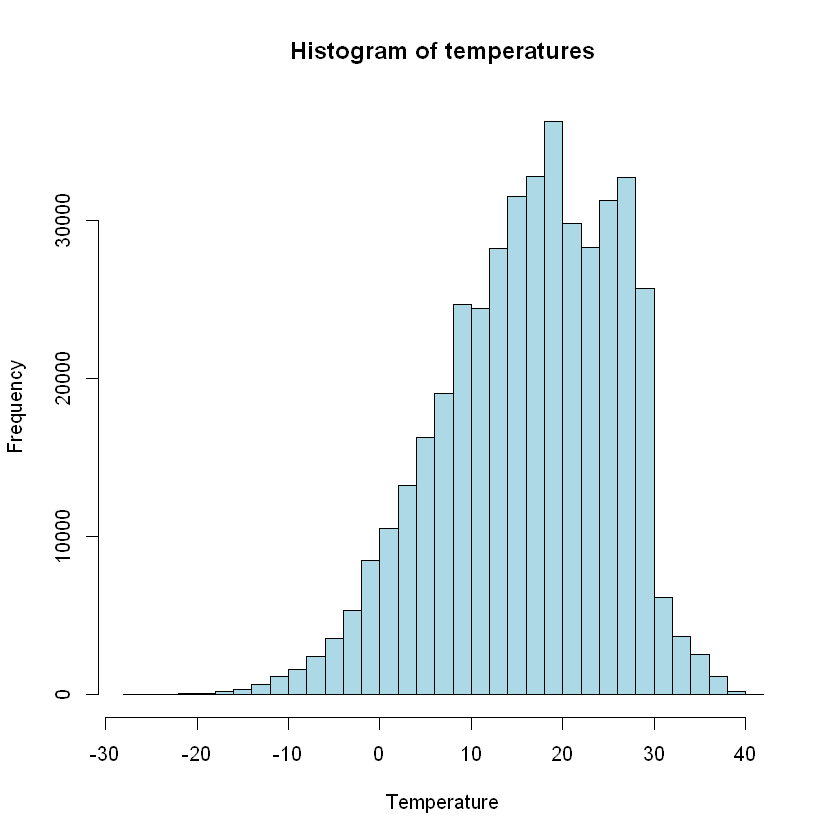

In [30]:
# DRAW STANDARD HISTOGRAM

hist(pop, 
     breaks = 40, 
     col = "lightblue", 
     main = "Histogram of temperatures", 
     xlab = "Temperature")

### Step 2: Find the deviation from normal distribution of the plot

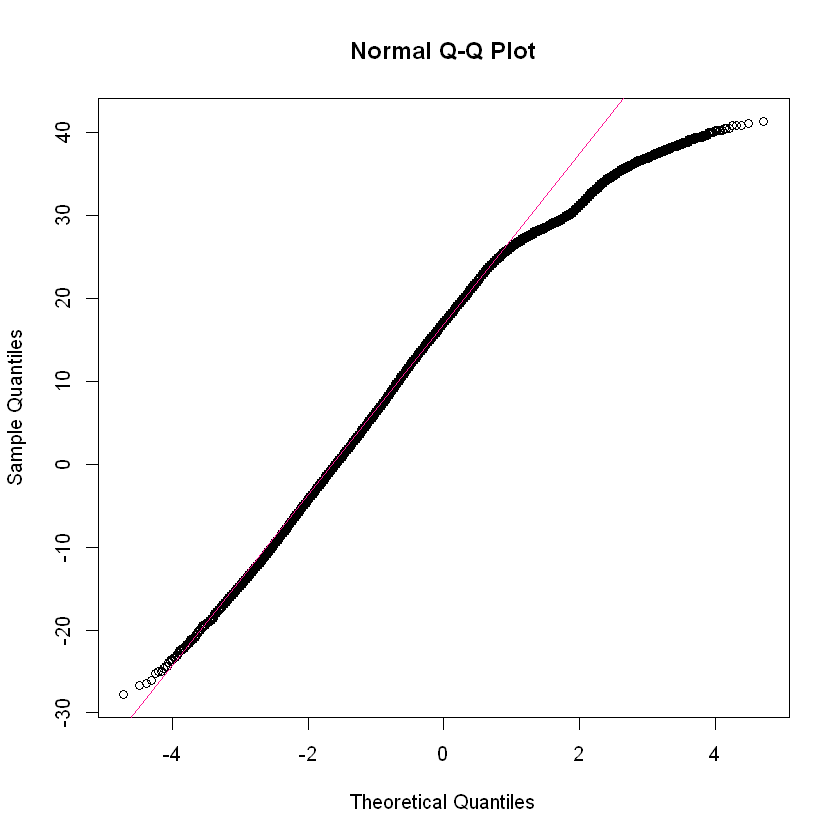

In [31]:
# DRAW QQNORM LINE

qqnorm(pop)
qqline(pop, col = "deeppink")

### Step 3: Find the mean and standard deviation of the dataset

In [32]:
# MEAN
mu <- mean(pop)
mu

# STANDARD DEVIATION
sigma <- sd(pop)
sigma

[1] 16.29877

[1] 9.43757

### Step 4: Draw a random sample of 100 temperatures

Plot your sample next to the population and calculate the mean of your sample.

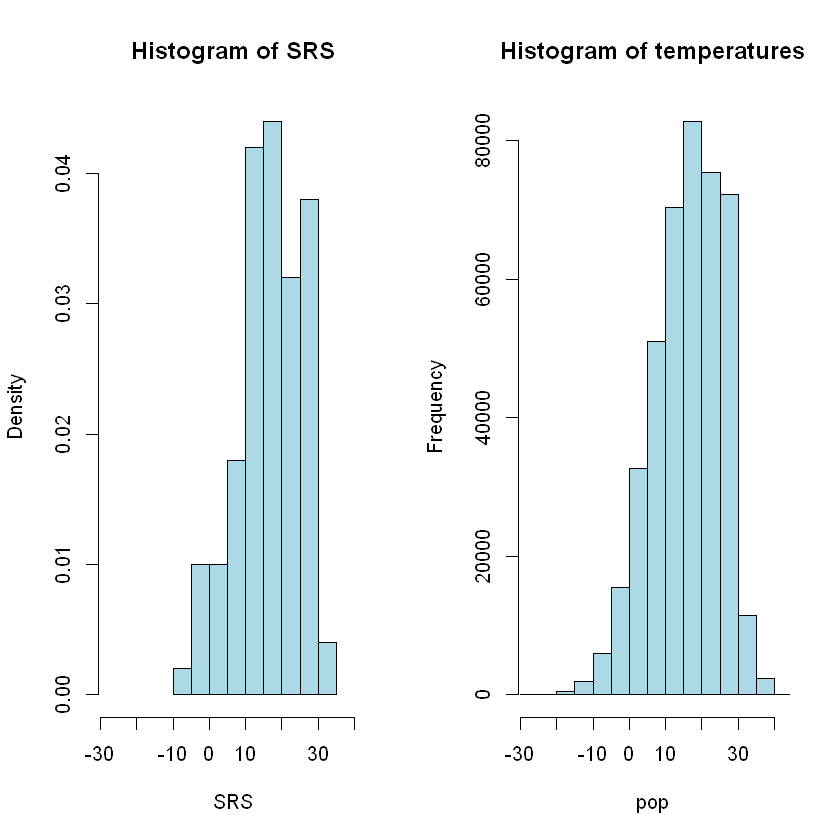

In [33]:
# GENERATE SAMPLE OF SIZE 100
SRS <- sample(pop, size = 100, replace = TRUE)

# SET GRAPHS BESIDE EACH OTHER
par(mfrow = c(1,2))

# SAMPLE GENERATED NUMBERS HISTOGRAM
hist(SRS, 
    col = "lightblue",
    xlim = range(pop),
    freq = FALSE)

# DATASET HISTOGRAM
hist(pop,
    col = "lightblue",
    xlim = range(pop),
    main = "Histogram of temperatures")

- Generally, the sample will have similar characteristics as the population, like skew to the left. But it really depends on your particular sample!

- With a sample size of only 100 out of over 400,000 data points, the mean and standard deviation of the sample are actually close to μ and σ.

In [34]:
mean(SRS)
sd(SRS)

[1] 16.704

[1] 8.841748

Was that just luck or can we expect that?

We note that anyone who took a sample of size 100 got a different sample mean. How much variability should we expect when estimating the population mean repeatedly from samples of size 100?

### Step 5: Draw 1000 samples of size 100. 

- What do you observe from the histogram of those sample means? 
- Around what value is it centred? 
- What is its variability?

We use a for-loop to draw 1000 random samples of size 100 and store the resulting means.

In [35]:
# GENERATE A VECTOR OF 1000 0s
trials    <- 1000
estimates <- numeric(trials)

# CREATE A FOR LOOP TO APPEND VALUES INTO ESTIMATES ARRAY
for (i in 1:trials) {
  SRS <- sample(pop, size = 100, replace = FALSE)
  estimates[i] <- mean(SRS)
}

### Step 6: Draw a histogram of all the sample means.

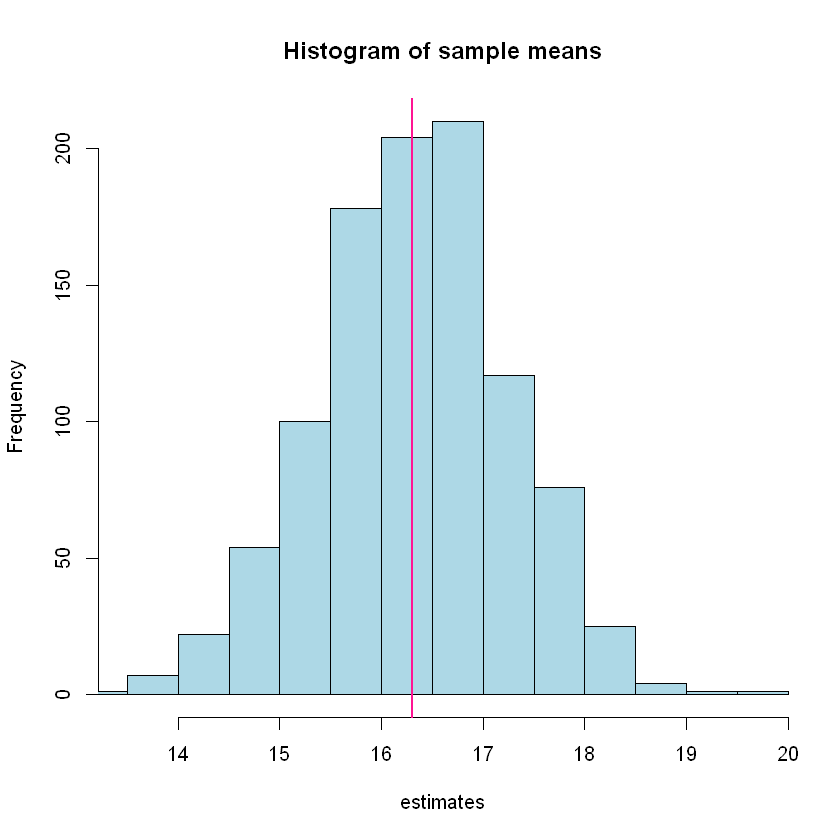

In [36]:
# PLOT HISTOGRAM OF SAMPLE MEANS

hist(estimates, 
     col="lightblue", 
     breaks=20, 
     xlim=range(estimates),
     main="Histogram of sample means")

# PLOT LINE TO SEPERATE DISTRIBUTION

abline(v = mu, lwd = 2, col = "deeppink")

### Step 7: Find the deviation of the sample means from normality

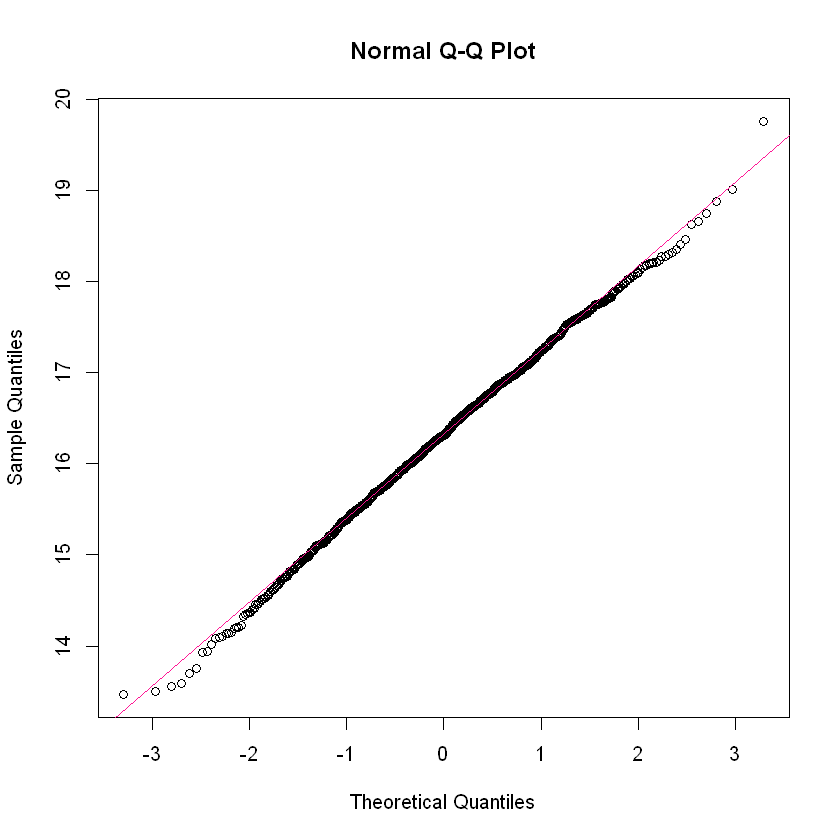

In [37]:
# PLOT QQNORM LINE
qqnorm(estimates)
qqline(estimates, col="deeppink")

The histogram of the sample means looks like a normal distribution, centred around the true population mean.

### Step 8: Compare the summary statistics of the dataset against the samples

In [38]:
mu
mean(estimates)

[1] 16.29877

[1] 16.31393

In [39]:
sigma
sd(estimates)

[1] 9.43757

[1] 0.9322002

### Step 9: Find the new standard deviation as a result of doing more trials

Will doing more trials (i.e. collecting more sample means) change the standard deviation of the sample means?

- What would you expect?

- Then just try by increasing the number of trials to 2000.

In [22]:
# INITIALIZE ARRAY OF ESTIMATES OF 1000 0s

trials <- 2000
estimates_more_trials <-numeric(trials)

# APPEND VALUES INTO ARRAY

for (i in 1:trials) {
  SRS <- sample(pop, size = 100, replace = FALSE)
  estimates_more_trials[i] <- mean(SRS)
}

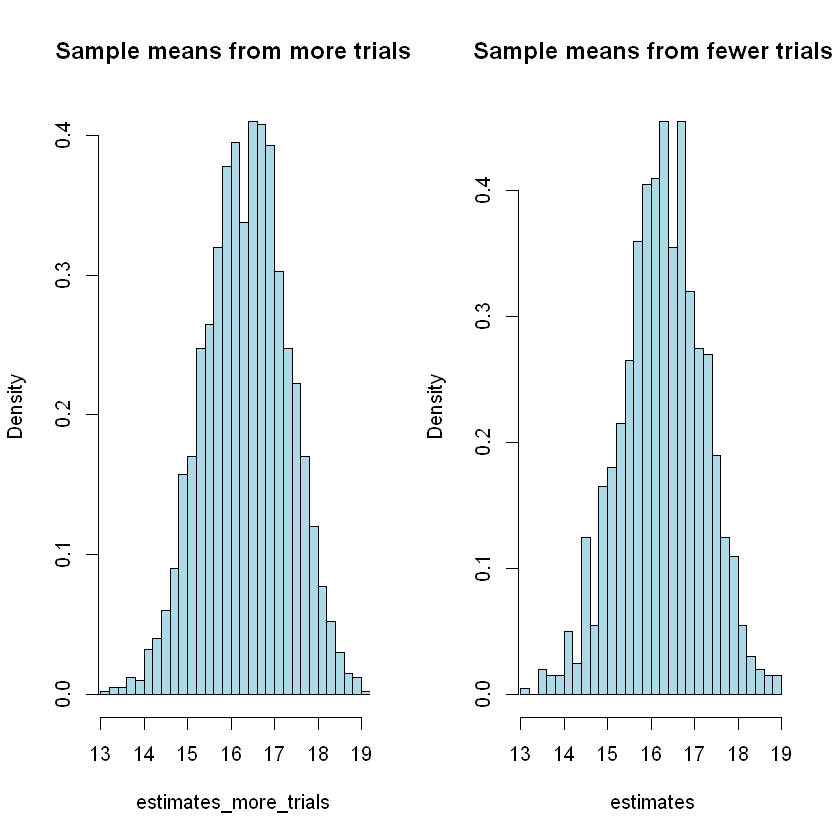

In [23]:
# PUT 2 GRAPHS SIDE BY SIDE
par(mfrow=c(1,2))

# PLOT SAMPLE MEANS HISTOGRAM OF MORE TRIALS
hist(estimates_more_trials, 
     breaks=40, 
     col="lightblue", 
     main="Sample means from more trials", 
     xlim=range(estimates), 
     freq = FALSE)

# PLOT SAMPLE MEANS HISTOGRAM OF LESS TRIALS
hist(estimates, 
     breaks=40, 
     col="lightblue", 
     main="Sample means from fewer trials",
     xlim=range(estimates), 
     freq = FALSE)

When taking more trials the standard deviation barely changed.

Will taking bigger sample sizes make the standard deviation of the sample means drop?

Go back to 1000 trials, but this time increase the sample size.

### Step 10: Find the new standard deviation of increasing sample size 

In [40]:
# INITIALIZE ARRAY OF 1000 0s of ESTIMATES

trials <- 1000
estimates_lss <-numeric(trials)

# CREATE A FOR LOOP AND APPEND SAMPLE MEANS INTO ARRAY

for (i in 1:trials) {
  SRS <- sample(pop, size = 500, replace = FALSE)
  estimates_lss[i] <- mean(SRS)
}

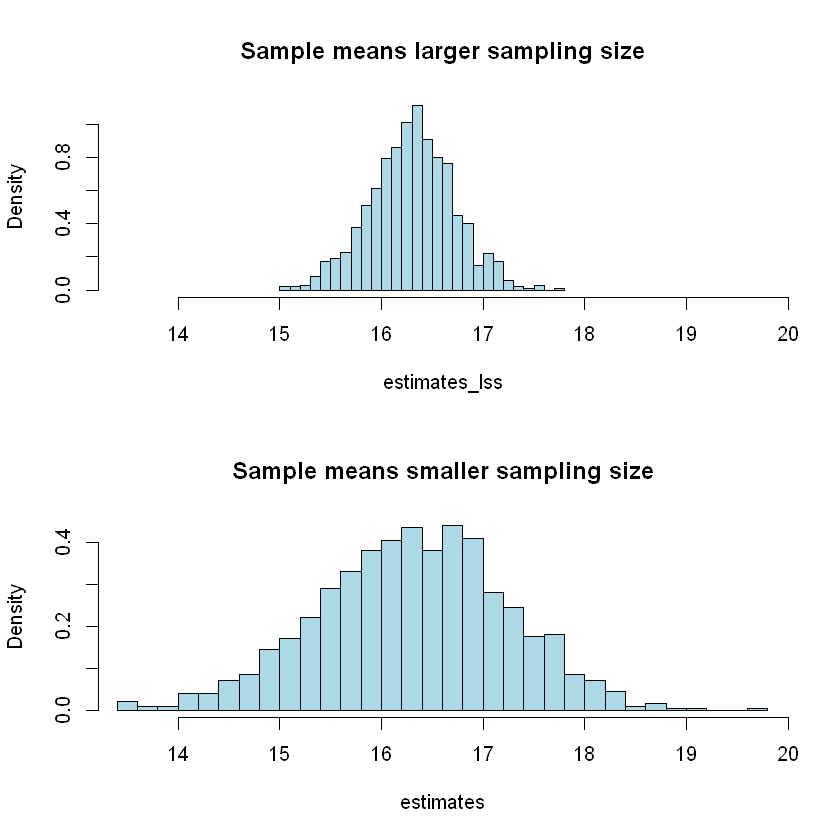

In [42]:
# PUT 2 GRAPHS SIDE BY SIDE

par(mfrow=c(2,1))

# PLOT HISTOGRAM OF ESTIMATES WITH INCREASED SAMPLE SIZE
hist(estimates_lss, 
     breaks=20, 
     col="lightblue", 
     xlim=range(estimates), 
     freq=FALSE, 
     main="Sample means larger sampling size")

# PLOT HISTOGRAM OF NORMAL SAMPLE MEANS
hist(estimates, 
     breaks=40, 
     col="lightblue", 
     xlim=range(estimates), 
     freq=FALSE, 
     main="Sample means smaller sampling size")



In [43]:
sd(estimates_lss)
sd(estimates)

[1] 0.4116148

[1] 0.9322002

Even going from sample size 100 to sample size 500 notably decreases the standard deviation, i.e. the spread of the histogram of the sample means.

### Sampling variability - discussion

If we repeatedly choose samples from the population, the sample mean will take different values in different samples.

Simple idea: if we repeat sampling many times and the mean does not change substantially (i.e. if we get similar answers each time), our estimates are fairly reliable.

- For larger sample size, the estimates tend to get better. Not every time though, since there is sampling variability.


- On the other hand, the standard deviation of the distribution of sample means does get smaller with larger sample size.


- Important is not that we happen to get a better estimate when we increase sample size, but that the chance to be closer to the true mean of the population is higher.


- The distribution of sample means tends towards a normal distribution. We come back to this point on Thursday. (But if this is so and if we knew its standard deviation we could use the 68-95-99 rule to say e.g. that there is a 95% chance of the mean estimated from a sample to lie withing 2 standard deviations of the truth.)

### Standard deviation of the sample means - discussion

This sounds great! But is it practical?

In order to find the standard deviation of the distribution of the sample means, we drew 1000 random samples of size 200.

Loosely speaking: If our population were people and we were doing a political poll, we might as well hold an election, rather than asking 1000 people a hundred thousand times who they’re going to vote for.

Is there a way out of this dilemma?

We observed that the standard deviation of the sample means decreased with the sample size.

Check from the estimates you got for sample size n=100 that it differs by roughly a factor of √100 from the population standard deviation.

In [44]:
sd(pop)

[1] 9.43757

For samples of size n = 100 we found

In [45]:
sd(estimates)

[1] 0.9322002

which differs by a factor of √100.

The approximation σ/√n is called the standard error of the means.

### Discussion

What we found so far is not only true for the temperatures in the US but much more generally.

Suppose the population is large and the sample size small compared to the population size. Then for sufficiently large sample size n:

- The sample means from a set of samples will be approximately normally distributed.

- They will have mean close to the unknown mean μ of the population.

- The variance of the sample means will be close to σ/n−−√.

Moral: The larger n is, the smaller is the standard deviation of the distribution of sample means and the closer the sample mean is likely to be to the population mean.